In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy import integrate
%matplotlib inline

# Constants

In [2]:
epsilon=1
r0=33.875/epsilon
alpha=4.075/epsilon
beta=(alpha/2)**2

# Quantum Numbers

In [3]:
l=0 #orbital number
t=1 #valley number

# Grid Parameters

In [11]:
N=200
kmax=1
k=np.linspace(0,kmax,N)
dk=k[1]-k[0]

# Functions

In [12]:
cos=lambda k:1/np.sqrt(1+beta*k**2)
sin=lambda k:np.sin(np.arccos(cos(k)))
T=lambda k:2/beta*np.sqrt(1+beta*k**2)
def I(k1,k2,l):
    def integral(phi):
        q=np.sqrt(k1**2+k2**2-2*k1*k2*np.cos(phi))
        return np.cos(phi*l)/(q*(1+r0*q))
    return integrate.quad(integral,0,2*np.pi)[0]/(4*np.pi)

# Construct Hamiltonian

In [13]:
H=np.zeros((N,N))
for i in range(N):
    H[i,i]+=2/beta*np.sqrt(1+beta*k[i]**2)
    for j in range(i+1,N):
            element=(1+cos(k[i]))*(1+cos(k[j]))*I(k[i],k[j],l)
            element+=2*sin(k[i])*sin(k[j])*I(k[i],k[j],l+t)
            element+=(1-cos(k[i]))*(1-cos(k[j]))*I(k[i],k[j],l+2*t)
            H[i,j]-=dk*element*k[j]
            H[j,i]=H[i,j]
    print(np.round(i/N*100+1),end='\r')

# Diagonalization

In [14]:
E,D=np.linalg.eigh(H)
D=D[:,np.argsort(E)];E=np.sort(E)

# Results

In [15]:
E_gap=np.min(T(k))
E=(E_gap-E)*3.3/(epsilon**2)

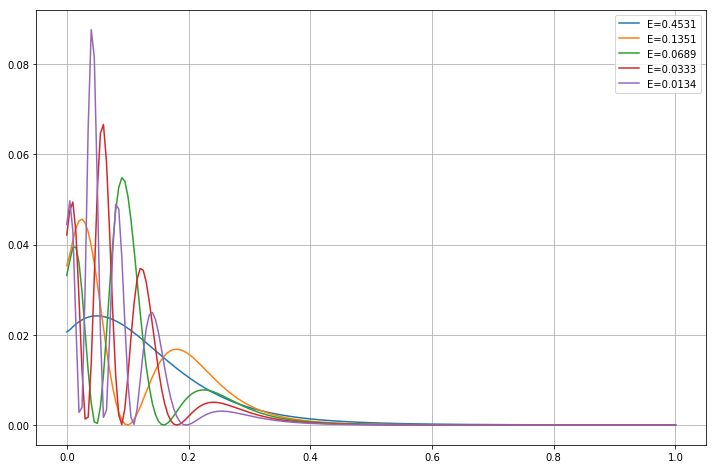

In [16]:
plt.figure(figsize=(12,8))
for i in range(E.size):
    if E[i]>0: 
        plt.plot(k,D[:,i]**2,'-',label='E='+str(np.round(E[i],4)))
plt.legend()
plt.grid()       